In [2]:
import pandas as pd
import os

In [3]:
input_loc  = "C:/Users/nwoko/Documents/Data/testrun/"
output_loc = "C:/Users/nwoko/Documents/Data/finalfile/"

In [4]:
filenames = os.listdir(input_loc)
filenames

['202004-divvy-tripdata.csv',
 '202005-divvy-tripdata.csv',
 '202006-divvy-tripdata.csv',
 '202007-divvy-tripdata.csv',
 '202008-divvy-tripdata.csv',
 '202009-divvy-tripdata.csv',
 '202010-divvy-tripdata.csv',
 '202011-divvy-tripdata.csv',
 '202012-divvy-tripdata.csv',
 '202101-divvy-tripdata.csv',
 '202102-divvy-tripdata.csv',
 '202103-divvy-tripdata.csv']

In [5]:
finalfile = pd.DataFrame()
for files in filenames:
    if files.endswith (".csv"):
        df = pd.read_csv(input_loc+files)
        finalfile = finalfile.append(df)
        
finalfile.to_csv(output_loc+"finalfile.csv", index=False)

In [6]:
finalfile.shape

(3489748, 13)

In [26]:
finalfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489748 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 372.7+ MB


In [6]:
finalfile.to_csv('reportcode.csv')

In [9]:
finalfile.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122175
start_station_id      122801
end_station_name      143242
end_station_id        143703
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
dtype: int64

In [24]:
finalfile.isnull().sum().sum()

541397

In [20]:
y=finalfile[finalfile.start_station_name.isnull()]

In [27]:
y.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2312,60742256DFFFCA29,electric_bike,2020-07-31 08:30:34,2020-07-31 08:57:54,NaN,NaN,Racine Ave & 35th St,367,41.90,-87.69,41.830704,-87.656084,member
13974,EBBD4FE9C8A95116,electric_bike,2020-07-29 19:02:25,2020-07-29 19:22:40,NaN,NaN,Western Ave & Walton St,374,41.90,-87.69,41.898404,-87.686592,member
25602,976336C6499A7189,electric_bike,2020-07-30 22:02:45,2020-07-30 22:17:54,NaN,NaN,Clarendon Ave & Leland Ave,251,41.94,-87.65,41.967841,-87.649991,member
42798,EC549CDABDE45F98,electric_bike,2020-07-31 15:54:41,2020-07-31 16:00:35,NaN,NaN,NaN,NaN,41.92,-87.70,41.910000,-87.680000,member
42801,70F53BFE303499AC,electric_bike,2020-07-31 16:08:26,2020-07-31 16:15:29,NaN,NaN,NaN,NaN,41.91,-87.68,41.920000,-87.700000,member


In [11]:
!pip install missingno

In [12]:
import missingno as msno

<AxesSubplot:>

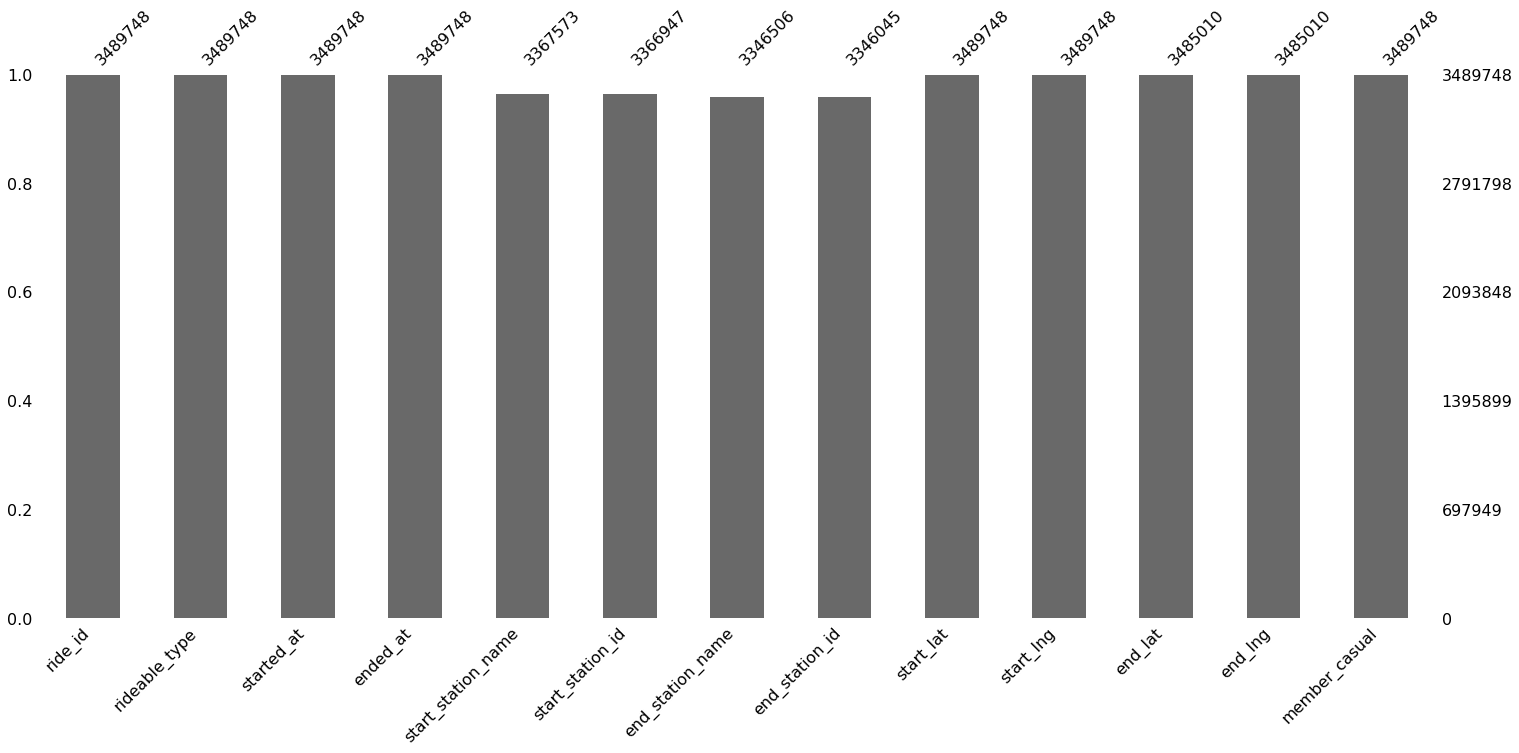

In [13]:
msno.bar(finalfile)

<AxesSubplot:>

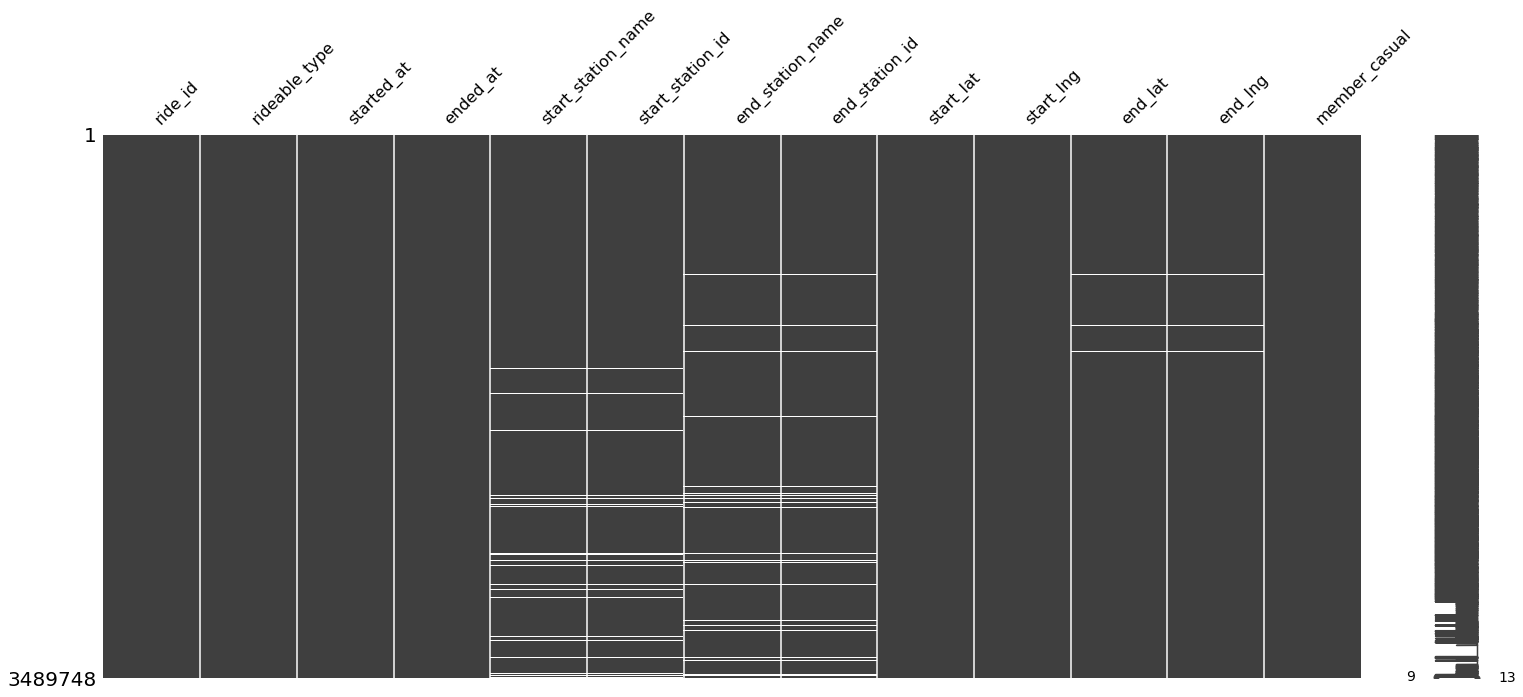

In [14]:
msno.matrix(finalfile)

<AxesSubplot:>

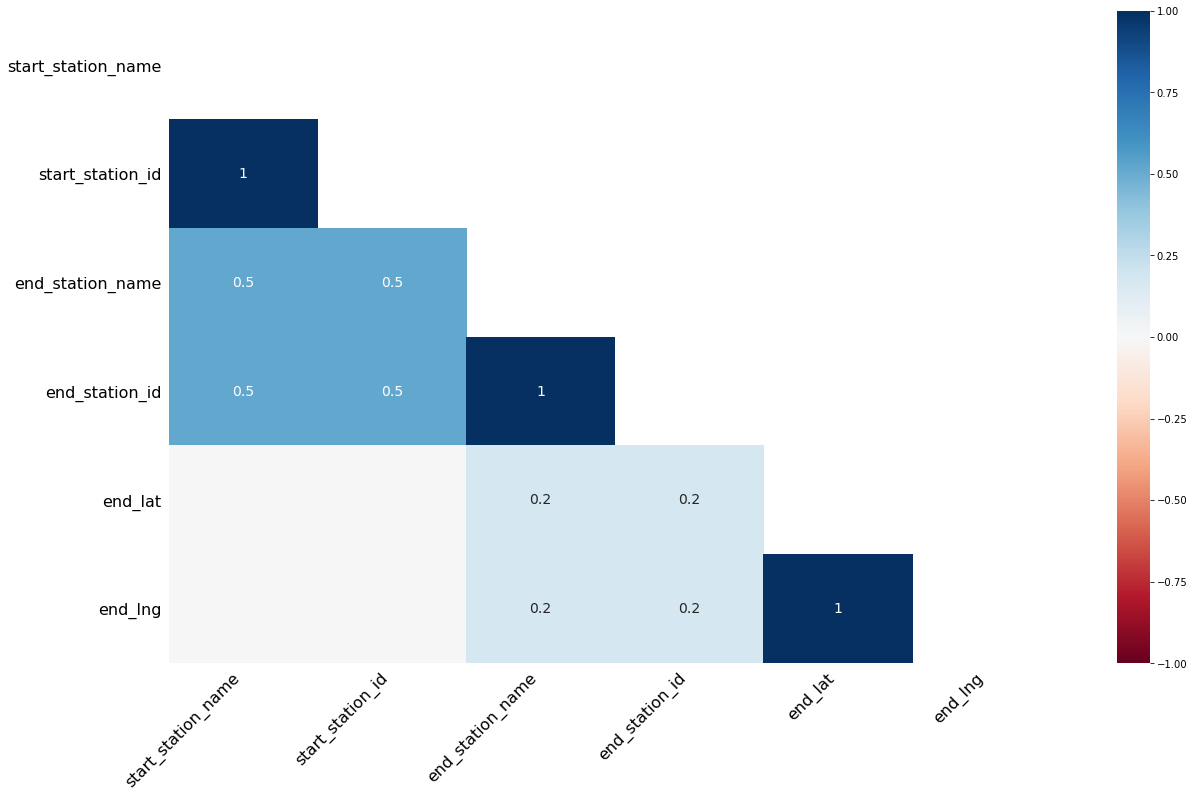

In [15]:
msno.heatmap(finalfile)

In [28]:
finalfile['started_at'] = finalfile['started_at'].astype('datetime64')
finalfile['ended_at'] = finalfile['ended_at'].astype('datetime64')

In [30]:
finalfile['ride_length'] = (finalfile['ended_at'] - finalfile['started_at'])/pd.Timedelta(minutes=1)

In [34]:
finalfile['ride_length'] = finalfile['ride_length'].astype('int32')

In [36]:
#number of rows with negtive values
finalfile[finalfile['ride_length'] < 0].count()

ride_id               1229
rideable_type         1229
started_at            1229
ended_at              1229
start_station_name    1182
start_station_id      1182
end_station_name      1165
end_station_id        1165
start_lat             1229
start_lng             1229
end_lat               1223
end_lng               1223
member_casual         1229
ride_length           1229
dtype: int64

In [37]:
finalfile.shape

(3489748, 14)

In [38]:
finalfile = finalfile[finalfile['ride_length'] >= 1]
finalfile = finalfile.reset_index()
finalfile = finalfile.drop(columns=['index'])

In [39]:
finalfile.shape

(3429432, 14)

In [40]:
finalfile[finalfile['ride_length'] < 0].count()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
dtype: int64

In [42]:
finalfile[finalfile['ride_length'] <= 0].count()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
dtype: int64

In [43]:
#Because the missing values in the dataset has do do with location, i decided no to drop these rows but instead exclude them in
#analysis phase when dealing with start and end locations

In [44]:
finalfile

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.896400,-87.661000,41.932200,-87.658600,member,26
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.924400,-87.715400,41.930600,-87.723800,member,8
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.894500,-87.617900,41.867900,-87.623000,member,14
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.903000,-87.697500,41.899200,-87.672200,member,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.890200,-87.626200,41.969500,-87.654700,casual,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429427,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual,143
3429428,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,8
3429429,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member,41
3429430,F8F43A0B978A7A35,classic_bike,2021-03-01 18:11:57,2021-03-01 18:18:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member,6


In [45]:
finalfile.to_csv('reportcode2.csv')
